In [151]:
import numpy as np
import pandas as pd
from sklearn import svm
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [152]:
data = loadmat('ex6data2.mat')
x = data["X"]
y = data["y"]

In [153]:
color = []
colors = y.ravel()

def setColor(mylist, colorlist):
    for i in mylist:
        if i==0:
            colorlist.append('r')
        else: 
            colorlist.append('b')

setColor(colors, color)

In [154]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state=123)

In [155]:
clf = DecisionTreeClassifier()
clf.fit(xTrain, yTrain.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
yTrainPred = clf.predict(xTrain)
print(accuracy_score(yTrain, yTrainPred))

1.0


In [157]:
yTestPred = clf.predict(xTest)
print(accuracy_score(yTest, yTestPred))

0.972972972972973


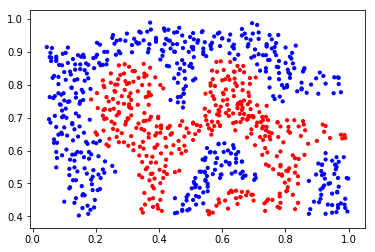

In [158]:
def plotData(X):
    dx, dy = X.T
    plt.scatter(dx, dy, 10, c=color)
plotData(x)

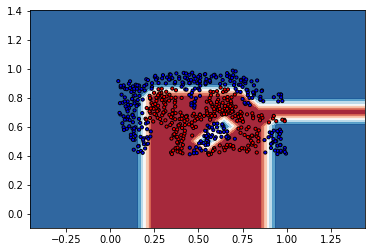

In [159]:
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# print(xx.ravel())

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

color.clear()
colors = yTrain.ravel()

setColor(colors, color)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.9)
plt.scatter(xTrain[:, 0], xTrain[:, 1], 10, c=color, edgecolor='black')
plt.show()